# C3.ai COVID-19 Data Lake Quickstart in Python  

Version 5.0 (August 11, 2020).

This Jupyter notebook shows some examples of how to access and use each of the [C3.ai COVID-19 Data Lake](https://c3.ai/covid/) APIs. These examples show only a small piece of what you can do with the C3.ai COVID-19 Data Lake, but will get you started with performing your own exploration. See the [API documentation](https://c3.ai/covid-19-api-documentation/) for more details.

Please contribute your questions, answers and insights on [Stack Overflow](https://www.stackoverflow.com). Tag `c3ai-datalake` so that others can view and help build on your contributions. For support, please send email to: [covid@c3.ai](mailto:covid@c3.ai).

## Table of Contents
- [Helper methods for accessing the API](#helpers)
- [Access OutbreakLocation data](#outbreaklocation)
    - [Case counts](#outbreaklocation/casecounts)
    - [Demographics](#outbreaklocation/demographics)
    - [Mobility](#outbreaklocation/mobility)
    - [Projections](#outbreaklocation/projections)
    - [Economic indicators](#outbreaklocation/economics)
- [Access LocationExposure data](#locationexposure)
- [Access LineListRecord data](#linelistrecord)
- [Join BiologicalAsset and Sequence data](#biologicalasset)
- [Access BiblioEntry data](#biblioentry)
- [Join TherapeuticAsset and ExternalLink data](#therapeuticasset)
- [Join Diagnosis and DiagnosisDetail data](#diagnosis)
- [Access VaccineCoverage data](#vaccinecoverage)
- [Access Policy data](#policy)
- [Access LaborDetail data](#labor)
- [Access Survey data](#survey)

Import the [requests](https://requests.readthedocs.io/en/master/), [pandas>=1.0.0](https://pandas.pydata.org/), [matplotlib](https://matplotlib.org/3.2.1/index.html), and [scipy](https://www.scipy.org/) libraries before using this notebook.

In [1]:
import requests
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import gamma
import numpy as np

ModuleNotFoundError: No module named 'matplotlib'

Ensure that you have a recent version of pandas (>= 1.0.0).

In [ ]:
print("pandas version", pd.__version__)
assert pd.__version__[0] >= "1", "To use this notebook, upgrade to the newest version of pandas. See https://pandas.pydata.org/pandas-docs/stable/getting_started/install.html for details."


<a id="helpers"></a>
## Helper methods for accessing the API

The helper methods in `c3aidatalake.py` convert a JSON response from the C3.ai APIs to a Pandas DataFrame. You may wish to view the code in `c3aidatalake.py` before using the quickstart examples.

In [8]:
import c3api.c3aidatalake as c3aidatalake

In [19]:
counties = c3aidatalake.fetch(
    "outbreaklocation",
    {
        "spec" : {
            "filter" : "contains(id, 'UnitedStates') && locationType == 'county'"
        }
    },
    get_all = True
)

In [21]:
counties['name'].apply(lambda )

,hospitalIcuBeds,hospitalStaffedBeds,hospitalLicensedBeds,latestTotalPopulation,populationOfAllChildren,latestLaborForce,latestEmployedPopulation,latestUnemployedPopulation,latestUnemploymentRate,laborForceOfAllChildren,locationType,populationCDS,id,name,typeIdent,location.value.id,location.timestamp,fips.id
0,6.0,25.0,25.0,24527.0,24527.0,10191.0,9567.0,624.0,6.123050,10191.0,county,24527.0,Abbeville_SouthCarolina_UnitedStates,Abbeville,EP_LOC,Abbeville_SouthCarolina_UnitedStates,2020-10-08T00:00:00Z,45001
1,7.0,171.0,186.0,62045.0,62045.0,24128.0,22397.0,1731.0,7.174237,24128.0,county,62045.0,Acadia_Louisiana_UnitedStates,Acadia,EP_LOC,Acadia_Louisiana_UnitedStates,2020-10-08T00:00:00Z,22001
2,10.0,46.0,52.0,32316.0,32316.0,16786.0,15819.0,967.0,5.760753,16786.0,county,32316.0,Accomack_Virginia_UnitedStates,Accomack,EP_LOC,Accomack_Virginia_UnitedStates,2020-10-08T00:00:00Z,51001
3,97.0,1195.0,1305.0,481587.0,481587.0,259772.0,249394.0,10378.0,3.995042,259772.0,county,481587.0,Ada_Idaho_UnitedStates,Ada,EP_LOC,Ada_Idaho_UnitedStates,2020-10-08T00:00:00Z,16001
4,4.0,25.0,25.0,7152.0,7152.0,3852.0,3690.0,162.0,4.205607,3852.0,county,7152.0,Adair_Iowa_UnitedStates,Adair,EP_LOC,Adair_Iowa_UnitedStates,2020-10-08T00:00:00Z,19001


In [25]:
# Total number of confirmed cases, deaths, and recoveries in Santa Clara, California
today = pd.Timestamp.now().strftime("%Y-%m-%d")
all_counties_time = []
ids = list(counties['id'].values)
for i in range(counties.shape[0] // 10):
    if i == 3: break;
    counties_time = c3aidatalake.evalmetrics(
        "outbreaklocation",
        {
            "spec" : {
                "ids": ids[i * 10: i * 10 + 10],
                "expressions" : ["CovidTrackingProject_ConfirmedCases", "CovidTrackingProject_ConfirmedDeaths"],
                "start" : "2020-01-01",
                "end" : today,
                "interval" : "DAY",
            #"filter" : "type == 'County'"
            }
        }
    )
    all_counties_time +=[counties_time]

len(all_counties_time)

Exception: Error: The number of identifiers exceedes the allowable limit of 10. (OutbreakLocation_evalMetricsExternal.js#18)

Plot these counts.

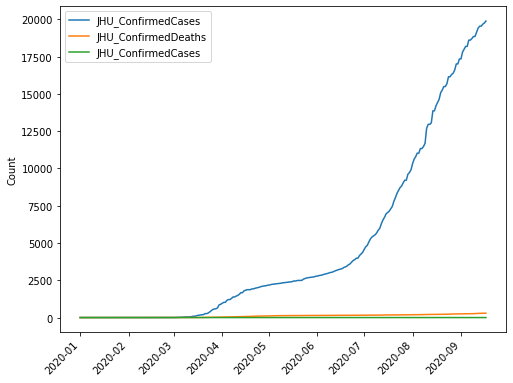

In [6]:
plt.figure(figsize = (8, 6))
plt.plot(
    casecounts["dates"],
    casecounts["SantaClara_California_UnitedStates.JHU_ConfirmedCases.data"],
    label = "JHU_ConfirmedCases"
)
plt.plot(
    casecounts["dates"],
    casecounts["SantaClara_California_UnitedStates.JHU_ConfirmedDeaths.data"],
    label = "JHU_ConfirmedDeaths"
)
plt.plot(
    casecounts["dates"],
    casecounts["SantaClara_California_UnitedStates.JHU_ConfirmedRecoveries.data"],
    label = "JHU_ConfirmedCases"
)
plt.legend()
plt.xticks(rotation = 45, ha = "right")
plt.ylabel("Count")
plt.show()

Export case counts as a .csv file.

In [ ]:
# Uncomment the line below to export the DataFrame as a .csv file
# casecounts.to_csv("casecounts.csv")

<a id="outbreaklocation/demographics"></a>
### Demographics

Demographic and economic data from the US Census Bureau and The World Bank allow demographic comparisons across locations. 

In [7]:
population = c3aidatalake.fetch(
    "populationdata",
    {
        "spec" : {
            "filter" : "!contains(parent, '_') && (populationAge == '>=65' || populationAge == 'Total') && gender == 'Male/Female' && year == '2018' && estimate == 'False' && percent == 'False'"
        }
    },
    get_all = True
)

population

,year,gender,race,ethnicity,populationAge,estimate,median,percent,value,minAge,origin,id,timestamp,parent.id
0,2018,Male/Female,Any race,Hispanic/Not Hispanic,>=65,False,False,False,960879.0,65.0,World Bank,2018_Afghanistan_Male/Female_>=65_Count_SP.POP...,2018-01-01T00:00:00Z,Afghanistan
1,2018,Male/Female,Any race,Hispanic/Not Hispanic,Total,False,False,False,37172386.0,NaN,World Bank,2018_Afghanistan_Male/Female_Total_Count_SP.PO...,2018-01-01T00:00:00Z,Afghanistan
2,2018,Male/Female,Any race,Hispanic/Not Hispanic,>=65,False,False,False,393976.0,65.0,World Bank,2018_Albania_Male/Female_>=65_Count_SP.POP.65U...,2018-01-01T00:00:00Z,Albania
3,2018,Male/Female,Any race,Hispanic/Not Hispanic,Total,False,False,False,2866376.0,NaN,World Bank,2018_Albania_Male/Female_Total_Count_SP.POP.TOTL,2018-01-01T00:00:00Z,Albania
4,2018,Male/Female,Any race,Hispanic/Not Hispanic,>=65,False,False,False,2686782.0,65.0,World Bank,2018_Algeria_Male/Female_>=65_Count_SP.POP.65U...,2018-01-01T00:00:00Z,Algeria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,2018,Male/Female,Any race,Hispanic/Not Hispanic,Total,False,False,False,28498687.0,NaN,World Bank,2018_Yemen_Male/Female_Total_Count_SP.POP.TOTL,2018-01-01T00:00:00Z,Yemen
480,2018,Male/Female,Any race,Hispanic/Not Hispanic,>=65,False,False,False,364332.0,65.0,World Bank,2018_Zambia_Male/Female_>=65_Count_SP.POP.65UP.TO,2018-01-01T00:00:00Z,Zambia
481,2018,Male/Female,Any race,Hispanic/Not Hispanic,Total,False,False,False,17351822.0,NaN,World Bank,2018_Zambia_Male/Female_Total_Count_SP.POP.TOTL,2018-01-01T00:00:00Z,Zambia
482,2018,Male/Female,Any race,Hispanic/Not Hispanic,>=65,False,False,False,424438.0,65.0,World Bank,2018_Zimbabwe_Male/Female_>=65_Count_SP.POP.65...,2018-01-01T00:00:00Z,Zimbabwe


In [8]:
population_age_distribution = population.loc[
    :, 
    ["populationAge", "parent.id", "value"]
].pivot(index = "parent.id", columns = "populationAge")['value']
population_age_distribution["proportion_over_65"] = population_age_distribution[">=65"] / population_age_distribution["Total"]

population_age_distribution

populationAge,>=65,Total,proportion_over_65
parent.id,,,
Afghanistan,960879.0,3.717239e+07,0.025849
Albania,393976.0,2.866376e+06,0.137447
Algeria,2686782.0,4.222843e+07,0.063625
Andorra,NaN,7.700600e+04,NaN
Angola,682859.0,3.080976e+07,0.022164
...,...,...,...
WestBankandGaza,143163.0,4.569087e+06,0.031333
World,673618927.0,7.594270e+09,0.088701
Yemen,819699.0,2.849869e+07,0.028763


Access global death counts.

In [9]:
global_deaths = c3aidatalake.evalmetrics(
    "outbreaklocation",
    {
        "spec" : {
            "ids" : list(population_age_distribution.index),
            "expressions" : ["JHU_ConfirmedDeaths"],
            "start" : "2020-05-01",
            "end" : "2020-05-01",
            "interval" : "DAY",
        }
    },
    get_all = True
)

global_deaths

,dates,Armenia.JHU_ConfirmedDeaths.data,Armenia.JHU_ConfirmedDeaths.missing,Afghanistan.JHU_ConfirmedDeaths.data,Afghanistan.JHU_ConfirmedDeaths.missing,Argentina.JHU_ConfirmedDeaths.data,Argentina.JHU_ConfirmedDeaths.missing,Angola.JHU_ConfirmedDeaths.data,Angola.JHU_ConfirmedDeaths.missing,AntiguaandBarbuda.JHU_ConfirmedDeaths.data,...,WestBankandGaza.JHU_ConfirmedDeaths.data,WestBankandGaza.JHU_ConfirmedDeaths.missing,UnitedStates.JHU_ConfirmedDeaths.data,UnitedStates.JHU_ConfirmedDeaths.missing,Yemen.JHU_ConfirmedDeaths.data,Yemen.JHU_ConfirmedDeaths.missing,Zimbabwe.JHU_ConfirmedDeaths.data,Zimbabwe.JHU_ConfirmedDeaths.missing,Zambia.JHU_ConfirmedDeaths.data,Zambia.JHU_ConfirmedDeaths.missing
0,2020-05-01,33,0,68,0,225,0,2,0,3,...,2,0,65029,0,2,0,4,0,3,0


In [10]:
global_deaths_by_country = global_deaths.filter(regex=("\.data")).melt()
global_deaths_by_country["country"] = global_deaths_by_country["variable"].str.replace("\..*", "")

global_comparison = global_deaths_by_country.set_index("country").join(population_age_distribution)
global_comparison["deaths_per_million"] = 1e6 * global_comparison["value"] / global_comparison["Total"] 
global_comparison

,variable,value,>=65,Total,proportion_over_65,deaths_per_million
country,,,,,,
Armenia,Armenia.JHU_ConfirmedDeaths.data,33,332187.0,2951776.0,0.112538,11.1797
Afghanistan,Afghanistan.JHU_ConfirmedDeaths.data,68,960879.0,37172386.0,0.025849,1.82931
Argentina,Argentina.JHU_ConfirmedDeaths.data,225,4946805.0,44494502.0,0.111178,5.0568
Angola,Angola.JHU_ConfirmedDeaths.data,2,682859.0,30809762.0,0.022164,0.0649145
AntiguaandBarbuda,AntiguaandBarbuda.JHU_ConfirmedDeaths.data,3,8473.0,96286.0,0.087998,31.1572
...,...,...,...,...,...,...
WestBankandGaza,WestBankandGaza.JHU_ConfirmedDeaths.data,2,143163.0,4569087.0,0.031333,0.437724
UnitedStates,UnitedStates.JHU_ConfirmedDeaths.data,65029,51641630.0,326687501.0,0.158077,199.056
Yemen,Yemen.JHU_ConfirmedDeaths.data,2,819699.0,28498687.0,0.028763,0.0701787


Plot the results.

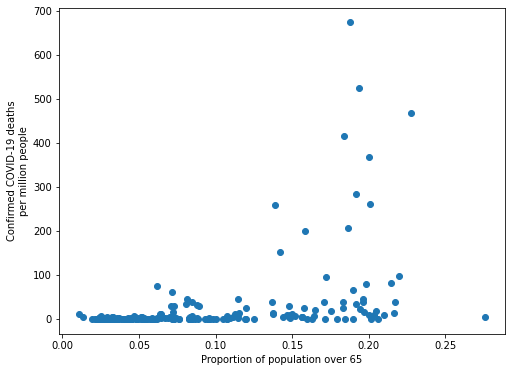

In [11]:
plt.figure(figsize = (8, 6))
plt.scatter(
    global_comparison["proportion_over_65"],
    global_comparison["deaths_per_million"]
)
plt.xlabel("Proportion of population over 65")
plt.ylabel("Confirmed COVID-19 deaths\nper million people")
plt.show()

<a id="outbreaklocation/mobility"></a>
### Mobility

Mobility data from Apple and Google provide a view of the impact of COVID-19 and social distancing on mobility trends.

In [12]:
mobility_trends = c3aidatalake.evalmetrics(
    "outbreaklocation",
    {
        "spec" : {
            "ids" : ["DistrictofColumbia_UnitedStates"],
            "expressions" : [
                "Apple_WalkingMobility", 
                "Apple_DrivingMobility",
                "Google_ParksMobility",
                "Google_ResidentialMobility"
              ],
            "start" : "2020-03-01",
            "end" : "2020-04-01",
            "interval" : "DAY",
        }
    },
    get_all = True
)

mobility_trends

,dates,DistrictofColumbia_UnitedStates.Apple_WalkingMobility.data,DistrictofColumbia_UnitedStates.Apple_WalkingMobility.missing,DistrictofColumbia_UnitedStates.Apple_DrivingMobility.data,DistrictofColumbia_UnitedStates.Apple_DrivingMobility.missing,DistrictofColumbia_UnitedStates.Google_ResidentialMobility.data,DistrictofColumbia_UnitedStates.Google_ResidentialMobility.missing,DistrictofColumbia_UnitedStates.Google_ParksMobility.data,DistrictofColumbia_UnitedStates.Google_ParksMobility.missing
0,2020-03-01,113.18,0,96.56,0,98,0,100,0
0,2020-03-02,104.74,0,106.99,0,100,0,99,0
0,2020-03-03,113.76,0,110.98,0,99,0,102,0
0,2020-03-04,120.47,0,112.23,0,99,0,108,0
0,2020-03-05,116.91,0,115.66,0,100,0,106,0
0,2020-03-06,130.96,0,130.54,0,101,0,94,0
0,2020-03-07,165.53,0,133.53,0,99,0,108,0
0,2020-03-08,125.01,0,100.47,0,99,0,133,0
0,2020-03-09,118.95,0,108.19,0,101,0,131,0
0,2020-03-10,106.91,0,106.25,0,100,0,113,0


Plot these mobility trends.

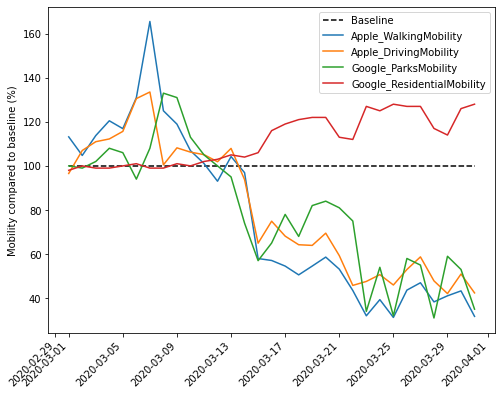

In [13]:
plt.figure(figsize = (8, 6))
plt.plot(
    mobility_trends["dates"],
    [100 for d in mobility_trends["dates"]],
    label = "Baseline",
    linestyle = "dashed",
    color = "black"
)
plt.plot(
    mobility_trends["dates"],
    mobility_trends["DistrictofColumbia_UnitedStates.Apple_WalkingMobility.data"],
    label = "Apple_WalkingMobility"
)
plt.plot(
    mobility_trends["dates"],
    mobility_trends["DistrictofColumbia_UnitedStates.Apple_DrivingMobility.data"],
    label = "Apple_DrivingMobility"
)
plt.plot(
    mobility_trends["dates"],
    mobility_trends["DistrictofColumbia_UnitedStates.Google_ParksMobility.data"],
    label = "Google_ParksMobility"
)
plt.plot(
    mobility_trends["dates"],
    mobility_trends["DistrictofColumbia_UnitedStates.Google_ResidentialMobility.data"],
    label = "Google_ResidentialMobility"
)
plt.legend()
plt.xticks(rotation = 45, ha = "right")
plt.ylabel("Mobility compared to baseline (%)")
plt.show()

<a id="outbreaklocation/projections"></a>
### Projections

Use the `GetProjectionHistory` API to retrieve versioned time series projections for specific metrics made at specific points in time.

In [14]:
# Retrieve projections made between April 13 and May 1 of mean total cumulative deaths in Spain from April 13 to May 13
projections = c3aidatalake.getprojectionhistory(
    {
        "outbreakLocation": "Spain", 
        "metric": "UniversityOfWashington_TotdeaMean_Hist",
        "metricStart": "2020-04-13", 
        "metricEnd": "2020-05-13",
        "observationPeriodStart": "2020-04-13",
        "observationPeriodEnd": "2020-05-01"
    }
)

projections

,dates,0.Spain.UniversityOfWashington_TotdeaMean_Hist.data,0.Spain.UniversityOfWashington_TotdeaMean_Hist.missing,0.Spain.UniversityOfWashington_TotdeaMean_Hist.expr,1.Spain.UniversityOfWashington_TotdeaMean_Hist.data,1.Spain.UniversityOfWashington_TotdeaMean_Hist.missing,1.Spain.UniversityOfWashington_TotdeaMean_Hist.expr,2.Spain.UniversityOfWashington_TotdeaMean_Hist.data,2.Spain.UniversityOfWashington_TotdeaMean_Hist.missing,2.Spain.UniversityOfWashington_TotdeaMean_Hist.expr,3.Spain.UniversityOfWashington_TotdeaMean_Hist.data,3.Spain.UniversityOfWashington_TotdeaMean_Hist.missing,3.Spain.UniversityOfWashington_TotdeaMean_Hist.expr,4.Spain.UniversityOfWashington_TotdeaMean_Hist.data,4.Spain.UniversityOfWashington_TotdeaMean_Hist.missing,4.Spain.UniversityOfWashington_TotdeaMean_Hist.expr
0,2020-04-13,17454.1,0,TotdeaMean Projections as of 2020-04-13,18056,0,TotdeaMean Projections as of 2020-04-17,18056,0,TotdeaMean Projections as of 2020-04-21,18056,0,TotdeaMean Projections as of 2020-04-22,18056,0,TotdeaMean Projections as of 2020-04-28
0,2020-04-14,17637.8,0,TotdeaMean Projections as of 2020-04-13,18579,0,TotdeaMean Projections as of 2020-04-17,18579,0,TotdeaMean Projections as of 2020-04-21,18579,0,TotdeaMean Projections as of 2020-04-22,18579,0,TotdeaMean Projections as of 2020-04-28
0,2020-04-15,17796.1,0,TotdeaMean Projections as of 2020-04-13,19130,0,TotdeaMean Projections as of 2020-04-17,19130,0,TotdeaMean Projections as of 2020-04-21,19130,0,TotdeaMean Projections as of 2020-04-22,19130,0,TotdeaMean Projections as of 2020-04-28
0,2020-04-16,17932.8,0,TotdeaMean Projections as of 2020-04-13,19688.8,0,TotdeaMean Projections as of 2020-04-17,19782,0,TotdeaMean Projections as of 2020-04-21,19782,0,TotdeaMean Projections as of 2020-04-22,19581,0,TotdeaMean Projections as of 2020-04-28
0,2020-04-17,18051,0,TotdeaMean Projections as of 2020-04-13,20209.2,0,TotdeaMean Projections as of 2020-04-17,20287,0,TotdeaMean Projections as of 2020-04-21,20287,0,TotdeaMean Projections as of 2020-04-22,20146,0,TotdeaMean Projections as of 2020-04-28
0,2020-04-18,18153.3,0,TotdeaMean Projections as of 2020-04-13,20688.6,0,TotdeaMean Projections as of 2020-04-17,20856,0,TotdeaMean Projections as of 2020-04-21,20856,0,TotdeaMean Projections as of 2020-04-22,20556,0,TotdeaMean Projections as of 2020-04-28
0,2020-04-19,18241.7,0,TotdeaMean Projections as of 2020-04-13,21125.5,0,TotdeaMean Projections as of 2020-04-17,21419,0,TotdeaMean Projections as of 2020-04-21,21419,0,TotdeaMean Projections as of 2020-04-22,20955,0,TotdeaMean Projections as of 2020-04-28
0,2020-04-20,18318.1,0,TotdeaMean Projections as of 2020-04-13,21518.9,0,TotdeaMean Projections as of 2020-04-17,21875.5,0,TotdeaMean Projections as of 2020-04-21,22034,0,TotdeaMean Projections as of 2020-04-22,21385,0,TotdeaMean Projections as of 2020-04-28
0,2020-04-21,18384.2,0,TotdeaMean Projections as of 2020-04-13,21869,0,TotdeaMean Projections as of 2020-04-17,22287.1,0,TotdeaMean Projections as of 2020-04-21,22474.5,0,TotdeaMean Projections as of 2020-04-22,21820,0,TotdeaMean Projections as of 2020-04-28
0,2020-04-22,18441.3,0,TotdeaMean Projections as of 2020-04-13,22176.8,0,TotdeaMean Projections as of 2020-04-17,22654.4,0,TotdeaMean Projections as of 2020-04-21,22870.5,0,TotdeaMean Projections as of 2020-04-22,22260,0,TotdeaMean Projections as of 2020-04-28


In [15]:
# Retrieve actual total cumulative deaths in Spain from April 1 to May 13
deaths = c3aidatalake.evalmetrics(
    "outbreaklocation",
    {
        "spec" : {
            "ids" : ["Spain"],
            "expressions" : ["JHU_ConfirmedDeaths"],
            "start" : "2020-04-01",
            "end" : "2020-05-13",
            "interval" : "DAY",
        }
    }
)

deaths

,dates,Spain.JHU_ConfirmedDeaths.data,Spain.JHU_ConfirmedDeaths.missing
0,2020-04-01,9387,0
0,2020-04-02,10348,0
0,2020-04-03,11198,0
0,2020-04-04,11947,0
0,2020-04-05,12641,0
0,2020-04-06,13341,0
0,2020-04-07,14045,0
0,2020-04-08,14792,0
0,2020-04-09,15447,0
0,2020-04-10,16081,0


Plot the results.

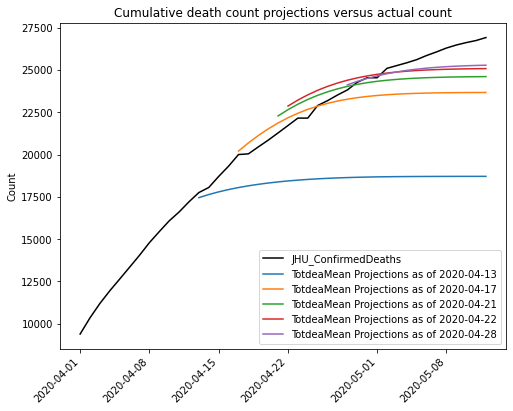

In [16]:
plt.figure(figsize = (8, 6))
plt.plot(
    deaths["dates"],
    deaths["Spain.JHU_ConfirmedDeaths.data"],
    label = "JHU_ConfirmedDeaths",
    color = "black"
)
for col in projections.columns:
    if 'data' in col:
        expr = projections[col.replace("data", "expr")].iloc[0]
        projection_date = pd.to_datetime(expr.split(" ")[-1])
        plt.plot(
            projections.loc[projections["dates"] >= projection_date, "dates"],
            projections.loc[projections["dates"] >= projection_date, col],
            label = expr
        )

plt.legend()
plt.xticks(rotation = 45, ha = "right")
plt.ylabel("Count")
plt.title("Cumulative death count projections versus actual count")
plt.show()

<a id="outbreaklocation/economics"></a>
### Economic indicators

GDP and employment statistics by business sector from the US Bureau of Economic Analysis enable comparisons of the drivers of local economies. 

In [17]:
# Real GDP for AccommodationAndFoodServices and FinanceAndInsurance in Alameda County, California

realgdp = c3aidatalake.evalmetrics(
    "outbreaklocation",
    {
        "spec": {
              "ids": ["Alameda_California_UnitedStates"], 
              "expressions": [
                "BEA_RealGDP_AccommodationAndFoodServices_2012Dollars",
                "BEA_RealGDP_FinanceAndInsurance_2012Dollars"

              ], 
              "start": "2000-01-01", 
              "end": "2020-01-01", 
              "interval":"YEAR"
        }
    }
)

realgdp

,dates,Alameda_California_UnitedStates.BEA_RealGDP_AccommodationAndFoodServices_2012Dollars.data,Alameda_California_UnitedStates.BEA_RealGDP_AccommodationAndFoodServices_2012Dollars.missing,Alameda_California_UnitedStates.BEA_RealGDP_FinanceAndInsurance_2012Dollars.data,Alameda_California_UnitedStates.BEA_RealGDP_FinanceAndInsurance_2012Dollars.missing
0,2000-01-01,0,100,0,100
0,2001-01-01,2.33706e+09,0,2.9075e+09,0
0,2002-01-01,2.41676e+09,0,3.30649e+09,0
0,2003-01-01,2.37486e+09,0,3.58019e+09,0
0,2004-01-01,2.2004e+09,0,3.34274e+09,0
0,2005-01-01,2.08449e+09,0,3.72292e+09,0
0,2006-01-01,2.21394e+09,0,3.90102e+09,0
0,2007-01-01,2.12123e+09,0,3.62078e+09,0
0,2008-01-01,2.07303e+09,0,3.02057e+09,0
0,2009-01-01,1.79131e+09,0,3.61458e+09,0


High frequency spending and earnings data from Opportunity Insights allow tracking of near real-time economic trends.

In [18]:
# Access consumer spending in healthcare and low income earnings in the healthcare and social assistance sector in California
opportunityinsights = c3aidatalake.evalmetrics(
    "outbreaklocation",
    {
        "spec": {
            "ids": ["California_UnitedStates"], 
            "expressions": [
                "OIET_Affinity_SpendHcs",
                "OIET_LowIncEmpAllBusinesses_Emp62"
            ], 
            "start": "2020-01-01", 
            "end": "2020-06-01", 
            "interval":"DAY"
        }
    }
)
    
opportunityinsights

,dates,California_UnitedStates.OIET_Affinity_SpendHcs.data,California_UnitedStates.OIET_Affinity_SpendHcs.missing,California_UnitedStates.OIET_LowIncEmpAllBusinesses_Emp62.data,California_UnitedStates.OIET_LowIncEmpAllBusinesses_Emp62.missing
0,2020-01-01,0,100,0,100
0,2020-01-02,0,100,0,100
0,2020-01-03,0,100,0,100
0,2020-01-04,0,100,0,100
0,2020-01-05,0,100,0,100
...,...,...,...,...,...
0,2020-05-27,-0.311,0,-0.313,0
0,2020-05-28,-0.307,0,-0.315,0
0,2020-05-29,-0.307,0,-0.316,0
0,2020-05-30,-0.298,0,-0.318,0


Plot the results.

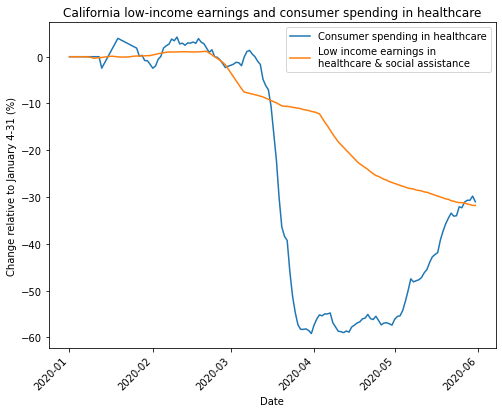

In [19]:
plt.figure(figsize = (8, 6))

plt.plot(
    opportunityinsights.dates,
    opportunityinsights['California_UnitedStates.OIET_Affinity_SpendHcs.data'] * 100,
    label = 'Consumer spending in healthcare'
)

plt.plot(
    opportunityinsights.dates,
    opportunityinsights['California_UnitedStates.OIET_LowIncEmpAllBusinesses_Emp62.data'] * 100,
    label = 'Low income earnings in\nhealthcare & social assistance '
)

plt.legend()
plt.title("California low-income earnings and consumer spending in healthcare")
plt.xlabel("Date")
plt.xticks(rotation = 45, ha = "right")
plt.ylabel("Change relative to January 4-31 (%)")

plt.show()

<a id="locationexposure"></a>
## Access Location Exposure data

`LocationExposure` stores information based on the movement of people's mobile devices across locations over time. It stores the following:  
* Location exposure index (LEX) for a pair of locations (`locationTarget`, `locationVisited`): the fraction of mobile devices that pinged in `locationTarget` on a date that also pinged in `locationVisited` at least once during the previous 14 days. The pair (`locationTarget`, `locationVisited`) can be two county locations or two state locations.
* Device count: the number of distinct mobile devices that pinged at `locationTarget` on the date.

See the [API documentation](https://c3.ai/covid-19-api-documentation/#tag/LocationExposures) for more details. 

In [23]:
exposure = c3aidatalake.read_data_json(
    "locationexposure",
    "getlocationexposures",
    {
        "spec":
        {
            "locationTarget": "California_UnitedStates",
            "locationVisited": "Nevada_UnitedStates",
            "start": "2020-01-20",
        }
    }
    
)

Access daily LEX where `locationTarget` is California and `locationVisited` is Nevada with the the `locationExposures` field.

In [24]:
lex = pd.json_normalize(exposure["locationExposures"]["value"])

lex

,locationTarget,locationVisited,timestamp,value
0,California_UnitedStates,Nevada_UnitedStates,2020-01-20T00:00:00.000Z,0.029796
1,California_UnitedStates,Nevada_UnitedStates,2020-01-21T00:00:00.000Z,0.028678
2,California_UnitedStates,Nevada_UnitedStates,2020-01-22T00:00:00.000Z,0.028347
3,California_UnitedStates,Nevada_UnitedStates,2020-01-23T00:00:00.000Z,0.028452
4,California_UnitedStates,Nevada_UnitedStates,2020-01-24T00:00:00.000Z,0.028923
...,...,...,...,...
138,California_UnitedStates,Nevada_UnitedStates,2020-06-07T00:00:00.000Z,0.020452
139,California_UnitedStates,Nevada_UnitedStates,2020-06-08T00:00:00.000Z,0.020608
140,California_UnitedStates,Nevada_UnitedStates,2020-06-09T00:00:00.000Z,0.020133
141,California_UnitedStates,Nevada_UnitedStates,2020-06-10T00:00:00.000Z,0.020090


Plot the LEX data to see the proportion of devices in California on each date that pinged in Nevada over the previous 14 days.

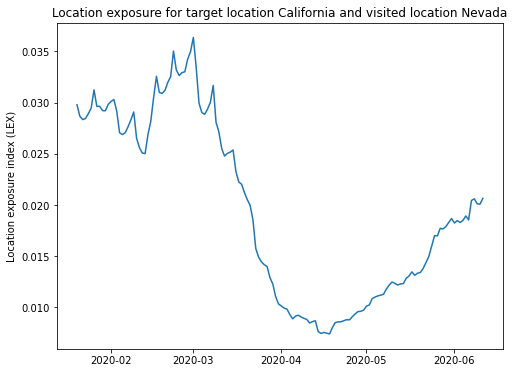

In [25]:
plt.figure(figsize = (8, 6))
plt.plot(
    pd.to_datetime(lex["timestamp"]),
    lex["value"]
)
plt.ylabel("Location exposure index (LEX)")
plt.title("Location exposure for target location California and visited location Nevada")
plt.show()

In [26]:
pd.to_datetime(lex["timestamp"])

0     2020-01-20 00:00:00+00:00
1     2020-01-21 00:00:00+00:00
2     2020-01-22 00:00:00+00:00
3     2020-01-23 00:00:00+00:00
4     2020-01-24 00:00:00+00:00
                 ...           
138   2020-06-07 00:00:00+00:00
139   2020-06-08 00:00:00+00:00
140   2020-06-09 00:00:00+00:00
141   2020-06-10 00:00:00+00:00
142   2020-06-11 00:00:00+00:00
Name: timestamp, Length: 143, dtype: datetime64[ns, UTC]

Access daily device counts with the `deviceCounts` field.

In [ ]:
pd.json_normalize(exposure["deviceCounts"]["value"])

<a id="linelistrecord"></a>
## Access LineListRecord data

`LineListRecord` stores individual-level crowdsourced information from laboratory-confirmed COVID-19 patients. Information includes gender, age, symptoms, travel history, location, reported onset, confirmation dates, and discharge status. See the [API documentation](https://c3.ai/covid-19-api-documentation/#tag/LineListRecord) for more details.

In [27]:
# Fetch the line list records tracked by MOBS Lab
records = c3aidatalake.fetch(
    "linelistrecord",
    {
        "spec" : {
            "filter" : "lineListSource == 'DXY'"
        }
    },
    get_all = True
)

records

,age,gender,symptomStartDate,exposureStartDate,exposureEndDate,hospitalAdmissionDate,caseConfirmationDate,livesInGroundZero,traveledToGroundZero,traveler,...,outcome,didDie,didRecover,recordSource,lineListSource,hasTravelHistory,id,location.id,caseInCountry,symptoms
0,66.0,male,2020-01-03T00:00:00Z,2019-12-29T00:00:00Z,2020-01-04T00:00:00Z,2020-01-11T00:00:00Z,2020-01-20T00:00:00Z,False,False,False,...,open,False,False,Shenzhen Municipal Health Commission: http://w...,DXY,False,1,ShenzhenGuangdong_China,NaN,NaN
1,56.0,male,2020-01-16T00:00:00Z,2020-01-08T00:00:00Z,2020-01-16T00:00:00Z,2020-01-20T00:00:00Z,2020-01-21T00:00:00Z,False,False,False,...,open,False,False,Beijing Municipal Health Commission: http://wj...,DXY,False,10,Beijing_China,NaN,NaN
2,70.0,male,2020-01-15T00:00:00Z,NaN,NaN,2020-01-19T00:00:00Z,2020-01-24T00:00:00Z,False,False,False,...,open,False,False,央视新闻: https://m.weibo.cn/status/4464497211305006?,DXY,False,100,WuhanHubei_China,NaN,NaN
3,NaN,other,NaN,NaN,2020-02-13T00:00:00Z,NaN,2020-02-25T00:00:00Z,False,False,False,...,open,False,False,1Point3Acres: https://coronavirus.1point3acres...,DXY,False,1000,UnitedStates,56.0,NaN
4,NaN,other,NaN,NaN,2020-02-13T00:00:00Z,NaN,2020-02-25T00:00:00Z,False,False,False,...,open,False,False,1Point3Acres: https://coronavirus.1point3acres...,DXY,False,1001,UnitedStates,57.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392,NaN,other,NaN,NaN,2020-02-13T00:00:00Z,NaN,2020-02-24T00:00:00Z,False,False,False,...,open,False,False,1Point3Acres: https://coronavirus.1point3acres...,DXY,False,995,UnitedStates,51.0,NaN
1393,NaN,other,NaN,NaN,2020-02-13T00:00:00Z,NaN,2020-02-24T00:00:00Z,False,False,False,...,open,False,False,1Point3Acres: https://coronavirus.1point3acres...,DXY,False,996,UnitedStates,52.0,NaN
1394,NaN,other,NaN,NaN,2020-02-13T00:00:00Z,NaN,2020-02-24T00:00:00Z,False,False,False,...,open,False,False,1Point3Acres: https://coronavirus.1point3acres...,DXY,False,997,UnitedStates,53.0,NaN
1395,NaN,other,NaN,NaN,2020-02-13T00:00:00Z,NaN,2020-02-25T00:00:00Z,False,False,False,...,open,False,False,1Point3Acres: https://coronavirus.1point3acres...,DXY,False,998,UnitedStates,54.0,NaN


What are the most common symptoms in this dataset?

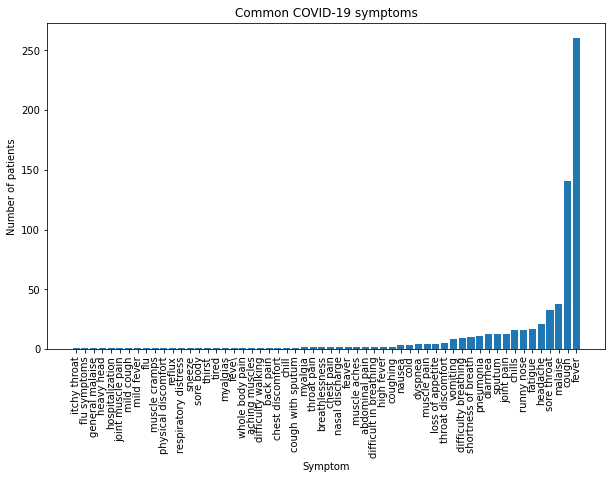

In [28]:
# Get all the symptoms, which are initially comma-separated
symptom_df = records.copy()
symptom_df["symptoms"] = symptom_df["symptoms"].str.split(", ")
symptom_df = symptom_df.explode("symptoms")
symptom_df = symptom_df.dropna(subset = ["symptoms"])
symptom_freq = symptom_df.groupby(["symptoms"]).agg("count")[["id"]].sort_values("id")

# Plot the data
plt.figure(figsize = (10, 6))
plt.bar(symptom_freq.index, symptom_freq["id"])
plt.xticks(rotation = 90)
plt.xlabel("Symptom")
plt.ylabel("Number of patients")
plt.title("Common COVID-19 symptoms")
plt.show()

If a patient is symptomatic and later hospitalized, how long does it take for them to become hospitalized after developing symptoms?

16


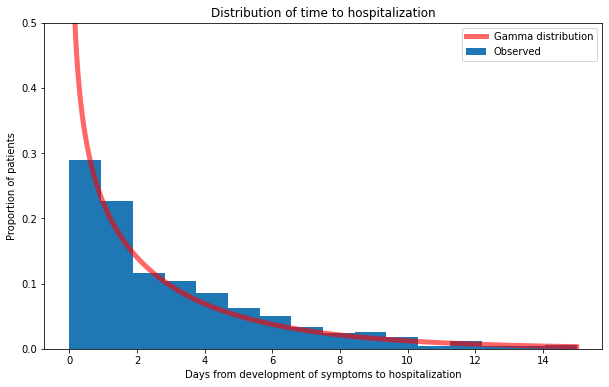

In [29]:
# Get the number of days from development of symptoms to hospitalization for each patient
hospitalized = records.dropna(subset = ["hospitalAdmissionDate", "symptomStartDate"])
hospitalization_time = np.array(
    pd.to_datetime(hospitalized['hospitalAdmissionDate']) - pd.to_datetime(hospitalized['symptomStartDate'])
).astype('timedelta64[D]').astype('float')
hospitalization_time = hospitalization_time[hospitalization_time >= 0]

# Hospitalization time of 0 days is replaced with 0.1 to indicate near-immediate hospitalization
hospitalization_time[hospitalization_time <= 0.1] = 0.1

# Fit a gamma distribution
a, loc, scale = gamma.fit(hospitalization_time, floc = 0)
dist = gamma(a, loc, scale)

# Plot the results
x = np.linspace(0, np.max(hospitalization_time), 1000)
n_bins = int(np.max(hospitalization_time) + 1)
print(n_bins)

plt.figure(figsize = (10, 6))
plt.hist(
    hospitalization_time, 
    bins = n_bins, 
    range = (0, np.max(hospitalization_time)), 
    density = True, 
    label = "Observed"
)
plt.plot(x, dist.pdf(x), 'r-', lw=5, alpha=0.6, label = 'Gamma distribution')
plt.ylim(0, 0.5)
plt.xlabel("Days from development of symptoms to hospitalization")
plt.ylabel("Proportion of patients")
plt.title("Distribution of time to hospitalization")
plt.legend()
plt.show()

<a id="biologicalasset"></a>
## Join BiologicalAsset and Sequence data

`BiologicalAsset` stores the metadata of the genome sequences collected from SARS-CoV-2 samples in the National Center for Biotechnology Information Virus Database. `Sequence` stores the genome sequences collected from SARS-CoV-2 samples in the National Center for Biotechnology Information Virus Database. See the API documentation for [BiologicalAsset](https://c3.ai/covid-19-api-documentation/#tag/BiologicalAsset) and [Sequence](https://c3.ai/covid-19-api-documentation/#tag/Sequence) for more details.

In [30]:
# Join data from BiologicalAsset & Sequence
sequences = c3aidatalake.fetch(
  "biologicalasset",
  {
    "spec" : {
      "include" : "this, sequence.sequence",
      "filter" : "exists(sequence.sequence)"
    }
  }
)

sequences

,assetType,sequenceType,species,genus,family,authors,genBankTitle,releaseDate,id,location.id,sequence.sequence,sequence.id,publications,nucleotideCompleteness,host,collectionDate,isolationSource,bioSample
0,protein sequence,GenBank,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,"Fearon,D., Powell,A.J., Douangamath,A., Owen,C...","Chain A, 3C-like proteinase",2020-03-12T00:00:00Z,5R7Y_A,NAN,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,5R7Y_A,NaN,NaN,NaN,NaN,NaN,NaN
1,protein sequence,GenBank,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,"Fearon,D., Powell,A.J., Douangamath,A., Owen,C...","Chain A, 3C-like proteinase",2020-03-12T00:00:00Z,5R7Z_A,NAN,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,5R7Z_A,NaN,NaN,NaN,NaN,NaN,NaN
2,protein sequence,GenBank,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,"Fearon,D., Powell,A.J., Douangamath,A., Owen,C...","Chain A, 3C-like proteinase",2020-03-12T00:00:00Z,5R80_A,NAN,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,5R80_A,NaN,NaN,NaN,NaN,NaN,NaN
3,protein sequence,GenBank,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,"Fearon,D., Powell,A.J., Douangamath,A., Owen,C...","Chain A, 3C-like proteinase",2020-03-12T00:00:00Z,5R81_A,NAN,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,5R81_A,NaN,NaN,NaN,NaN,NaN,NaN
4,protein sequence,GenBank,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,"Fearon,D., Powell,A.J., Douangamath,A., Owen,C...","Chain A, 3C-like proteinase",2020-03-12T00:00:00Z,5R82_A,NAN,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...,5R82_A,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,nucleotide sequence,GenBank,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,"Alikhan,N.-F., Page,A., Le Viet,T., Telatin,A....",Severe acute respiratory syndrome coronavirus ...,2020-07-10T00:00:00Z,LR814257,NAN,ACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATC...,LR814257,NaN,NaN,NaN,NaN,NaN,SAMEA6915493
1996,nucleotide sequence,GenBank,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,"Alikhan,N.-F., Page,A., Le Viet,T., Telatin,A....",Severe acute respiratory syndrome coronavirus ...,2020-07-10T00:00:00Z,LR814258,NAN,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,LR814258,NaN,NaN,NaN,NaN,NaN,SAMEA6915513
1997,nucleotide sequence,GenBank,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,"Alikhan,N.-F., Page,A., Le Viet,T., Telatin,A....",Severe acute respiratory syndrome coronavirus ...,2020-07-10T00:00:00Z,LR814259,NAN,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNACTTTCGATCTC...,LR814259,NaN,NaN,NaN,NaN,NaN,SAMEA6915537
1998,nucleotide sequence,GenBank,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,"Alikhan,N.-F., Page,A., Le Viet,T., Telatin,A....",Severe acute respiratory syndrome coronavirus ...,2020-07-10T00:00:00Z,LR814260,NAN,ACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATC...,LR814260,NaN,NaN,NaN,NaN,NaN,SAMEA6915467


<a id="biblioentry"></a>
## Access BiblioEntry data

`BiblioEntry` stores the metadata about the journal articles in the CORD-19 Dataset. See the [API documentation](https://c3.ai/covid-19-api-documentation/#tag/BiblioEntry) for more details.

In [31]:
# Fetch metadata for the first two thousand (2000) BiblioEntry journal articles approved for commercial use
# Note that 2000 records are returned; the full dataset can be accessed using the get_all = True argument in fetch
bibs = c3aidatalake.fetch(
  "biblioentry",
  {
      "spec" : {
          "filter" : "hasFullText == true"
      }
  }
)

# Sort them to get the most recent articles first
bibs["publishTime"] = pd.to_datetime(bibs["publishTime"])
bibs = bibs.sort_values("publishTime", ascending = False)

bibs

,sha,source,title,doi,pmcid,pubmedId,license,abstractText,publishTime,authors,journal,hasFullText,fullTextFile,url,id,idMsftPaper,whoCovidence
1399,1d13ecdd4ba7d566d6603153b533e446a1a6f6c8,Elsevier,20 Infection Prevention and Control in the Tro...,10.1016/b978-0-323-55512-8.00020-x,NaN,NaN,els-covid,Abstract Tropical settings present unique chal...,2020-12-31,"Shakoor, Sadia; Warraich, Haider J.; Zaidi, An...",Hunter's Tropical Medicine and Emerging Infect...,True,custom_license,https://doi.org/10.1016/b978-0-323-55512-8.000...,1mcgocvb,NaN,NaN
1174,4c919067310ae193d7b278ed2130304f4ebada63,Elsevier,150 Fever in the Returned Traveler,10.1016/b978-0-323-55512-8.00150-2,NaN,NaN,els-covid,Abstract International travel is associated wi...,2020-12-31,"Marks, Michael; Johnston, Victoria; Brown, Mic...",Hunter's Tropical Medicine and Emerging Infect...,True,custom_license,https://doi.org/10.1016/b978-0-323-55512-8.001...,1d1sfzjx,NaN,NaN
1181,cc05521634a830e5f599bb3c11935e78e0db048f,Elsevier,Chapter 11 Baculovirus-Derived Vectors for Imm...,10.1016/b978-0-12-814966-9.00011-1,NaN,NaN,els-covid,"Abstract Baculoviruses are arthropod-specific,...",2020-12-31,"Fabre, M. Laura; Arrías, Paula N.; Masson, Tom...",Emerging and Reemerging Viral Pathogens,True,custom_license,https://doi.org/10.1016/b978-0-12-814966-9.000...,1db5qvi0,NaN,NaN
1311,70fb731991783c6a307ef1d793ca8b7fd981620b,Elsevier,Chapter 6 The immunosuppressed traveler: infec...,10.1016/b978-0-444-64217-2.00006-3,NaN,NaN,els-covid,Abstract The travel-related infection risks in...,2020-12-31,"Allen, Victoria; Longley, Nicky; Galloway, Jam...",Handbook of Systemic Autoimmune Diseases,True,custom_license,https://doi.org/10.1016/b978-0-444-64217-2.000...,1irbbc1l,NaN,NaN
323,efb46b27c6a89c6b95641816414da41f172f33fd,Elsevier,Virus Taxonomy,10.1016/b978-0-12-809633-8.21231-4,NaN,NaN,els-covid,Abstract Virus taxonomy is the classification ...,2020-12-31,"Kuhn, Jens H.",Reference Module in Life Sciences,True,custom_license,https://doi.org/10.1016/b978-0-12-809633-8.212...,0ckt6f92,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,3bf6dd69ef30302a35b08eb056ad25d8dbadf67d,Elsevier,"INDEX TO VOLUME II, 1975",10.1016/s0140-6736(75)92947-5,NaN,NaN,els-covid,NaN,1975-07-05,NaN,The Lancet,True,custom_license,https://doi.org/10.1016/s0140-6736(75)92947-5,1qt5yvpq,NaN,NaN
339,28154099ea7ea68263a58d08ff3ffbc9e9170ae7,Elsevier,Treatment and Control of Neonatal Diarrhea in ...,10.3168/jds.s0022-0302(75)84589-9,NaN,163850.0,els-covid,Abstract Treatment and control of acute neonat...,1975-03-31,"Radostits, O.M.",Journal of Dairy Science,True,custom_license,https://doi.org/10.3168/jds.s0022-0302(75)84589-9,0d4hllab,NaN,NaN
350,c6ef7b36318bd1baf0f3a6638ef571b755d8cfd6,Elsevier,NaN,10.1016/b978-0-12-253040-1.50023-3,NaN,NaN,els-covid,Unknown,1974-12-31,NaN,The Biology of Animal Viruses,True,custom_license,https://doi.org/10.1016/b978-0-12-253040-1.500...,0dd4yzdh,NaN,NaN
1587,d272ee94aa8f099b7468edb9352555e502b0413c,Elsevier,CHAPTER 1 The Nature and Classification of Ani...,10.1016/b978-0-12-253040-1.50006-3,NaN,NaN,els-covid,NaN,1974-12-31,"FENNER, FRANK; McAUSLAN, B.R.; MIMS, C.A.; SAM...",The Biology of Animal Viruses,True,custom_license,https://doi.org/10.1016/b978-0-12-253040-1.500...,1tionxun,NaN,NaN


Use `GetArticleMetadata` to access the full-text of these articles, or in this case, the first page text.

In [32]:
bib_id = bibs.loc[0, "id"] 
print(bib_id)

article_data = c3aidatalake.read_data_json(
    "biblioentry",
    "getarticlemetadata",
    {
        "ids" : [bib_id]
    }
)

article_data["value"]["value"][0]["body_text"][0]["text"]

000q5l5n


'Wild and peridomestic rats, especially the Norway rat (Rattus norvegicus) and black rat (Rattus rattus), are known reservoirs of a number of rodent and zoonotic pathogens [1] . They are ubiquitous in urban and rural environments and are major pests of public health significance, as they carry and transmit pathogens that can cause significant mortality in humans and animals [2] . Wild rats may pose an animal biosecurity risk to laboratory rodent colonies due to inadvertent transmission, possibly causing significant complications in biomedical research [3] , in addition to zoonotic risks to laboratory animal caretakers and other personnel.'

<a id="therapeuticasset"></a>
## Join TherapeuticAsset and ExternalLink data

`TherapeuticAsset` stores details about the research and development (R&D) of coronavirus therapies, for example, vaccines, diagnostics, and antibodies. `ExternalLink` stores website URLs cited in the data sources containing the therapies stored in the TherapeuticAssets C3.ai Type. See the API documentation for [TherapeuticAsset](https://c3.ai/covid-19-api-documentation/#tag/TherapeuticAsset) and [ExternalLink](https://c3.ai/covid-19-api-documentation/#tag/ExternalLink) for more details.

In [33]:
# Join data from TherapeuticAsset and ExternalLink (productType, description, origin, and URL links)
assets = c3aidatalake.fetch(
  "therapeuticasset",
  {
      "spec" : {
          "include" : "productType, description, origin, links.url",
          "filter" : "origin == 'Milken'"
      }
  }
)

assets = assets.explode("links")
assets["links"] = [link["url"] if type(link) == dict and "url" in link.keys() else None for link in assets["links"]]
assets

,productType,description,origin,links,id
0,Protein subunit,Spike protein; VaxiPatch microneedle array der...,Milken,https://docs.google.com/document/d/1Y4nCJJ4njz...,007374a9199cbf884892fb90bbb8241f
1,Antibodies,"Remsima (infliximab), anti-TNF antibody",Milken,https://docs.google.com/document/d/1Y4nCJJ4njz...,01fea51894afdf874adc5a7595bbffa7
2,Virus-like particle,Enveloped virus-like particle (eVLP): Pan-coro...,Milken,https://docs.google.com/document/d/1Y4nCJJ4njz...,0263fec6802771292ae36e73f2a73c57
3,Other,"nafamostat, approved in Japan to treat pancrea...",Milken,https://docs.google.com/document/d/1Y4nCJJ4njz...,030a34cac0ff6064c8fadd0b33e7f377
4,Protein subunit,Spike-based (epitope screening),Milken,https://docs.google.com/document/d/1Y4nCJJ4njz...,031acb82c8ca55b84c752ffeb053910d
...,...,...,...,...,...
898,NaN,Unknown,Milken,None,milkenvaccine_136
899,NaN,Unknown,Milken,None,milkenvaccine_137
900,NaN,TerraCoV2,Milken,None,milkenvaccine_138
901,NaN,AVI-205,Milken,None,milkenvaccine_139


<a id="diagnosis"></a>
## Join Diagnosis and DiagnosisDetail data

`Diagnosis` stores basic clinical data (e.g. clinical notes, demographics, test results, x-ray or CT scan images) about individual patients tested for COVID-19, from research papers and healthcare institutions. 


`DiagnosisDetail` stores detailed clinical data (e.g. lab tests, pre-existing conditions, symptoms) about individual patients in key-value format. See the API documentation for [Diagnosis](https://c3.ai/covid-19-api-documentation/#tag/Diagnosis) and [DiagnosisDetail](https://c3.ai/covid-19-api-documentation/#tag/DiagnosisDetail) for more details.

In [34]:
diagnoses = c3aidatalake.fetch(
  "diagnosis",
  {
      "spec" : {
          "filter" : "contains(testResults, 'COVID-19')", 
          "include" : "this, diagnostics.source, diagnostics.key, diagnostics.value"
      }
  }
)

diagnoses

,diagnostics,imageUrl,source,idPatient,testResults,id,location.id,age,clinicalNotes,temperature
0,"[{'parent': {'id': '00870a9c.jpg'}, 'key': 'RT...",MONTREAL/images/00870a9c.jpg,Montreal,226,COVID-19: positive,00870a9c.jpg,Hannover_Germany,NaN,NaN,NaN
1,[{'parent': {'id': '01E392EE-69F9-4E33-BFCE-E5...,MONTREAL/images/01E392EE-69F9-4E33-BFCE-E5C968...,Montreal,46,COVID-19: positive,01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg,Italy,55.0,"Woman, 55 years old, reports dyspnea for a few...",NaN
2,[{'parent': {'id': '03BF7561-A9BA-4C3C-B8A0-D3...,MONTREAL/images/03BF7561-A9BA-4C3C-B8A0-D3E585...,Montreal,77,COVID-19: positive,03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg,Italy,65.0,"Female patient, 65 years old, in a pathologica...",NaN
3,[{'parent': {'id': '071d06607edf81d70c940e043b...,MONTREAL/images/071d06607edf81d70c940e043bce34...,Montreal,351,COVID-19: positive,071d06607edf81d70c940e043bce34_jumbo.jpeg,UnitedKingdom,65.0,Presentation: SOB and myalgia.. Imaging Notes:...,NaN
4,[{'parent': {'id': '078d2e0b3e4fec1d603efb0e81...,MONTREAL/images/078d2e0b3e4fec1d603efb0e818c31...,Montreal,459,COVID-19: positive,078d2e0b3e4fec1d603efb0e818c31_jumbo.jpeg,Hungary,70.0,"DM, hypertension, congestive heart failure, ch...",NaN
...,...,...,...,...,...,...,...,...,...,...
1995,[{'parent': {'id': 'radiopaedia_org_covid-19-p...,MONTREAL/images/radiopaedia_org_covid-19-pneum...,Montreal,133,COVID-19: positive,radiopaedia_org_covid-19-pneumonia-10_85902_3-...,Tehran_Iran,25.0,Air space consolidation is present at the righ...,NaN
1996,[{'parent': {'id': 'radiopaedia_org_covid-19-p...,MONTREAL/images/radiopaedia_org_covid-19-pneum...,Montreal,23,COVID-19: positive,radiopaedia_org_covid-19-pneumonia-14_85914_0-...,Rome_Italy,70.0,Bilateral ground-glass opacities are seen in b...,NaN
1997,[{'parent': {'id': 'radiopaedia_org_covid-19-p...,MONTREAL/images/radiopaedia_org_covid-19-pneum...,Montreal,132,COVID-19: positive,radiopaedia_org_covid-19-pneumonia-23_86359_0-...,Edinburgh_Scotland_UnitedKingdom,70.0,Multifocal regions of consolidation and ground...,NaN
1998,[{'parent': {'id': 'radiopaedia_org_covid-19-p...,MONTREAL/images/radiopaedia_org_covid-19-pneum...,Montreal,135,COVID-19: positive,radiopaedia_org_covid-19-pneumonia-27_86410_0-...,Izmir_Turkey,80.0,Fever and cough for a few days. Axial CT show...,NaN


In [35]:
diagnoses_long = diagnoses.explode("diagnostics")
diagnoses_long = pd.concat([
    diagnoses_long.reset_index(),
    pd.json_normalize(
        diagnoses_long.loc[diagnoses_long.source != 'UCSD', "diagnostics"]
    )[["key", "value"]]
], axis = 1).drop(columns = "diagnostics")
diagnoses_long

,index,imageUrl,source,idPatient,testResults,id,location.id,age,clinicalNotes,temperature,key,value
0,0,MONTREAL/images/00870a9c.jpg,Montreal,226,COVID-19: positive,00870a9c.jpg,Hannover_Germany,NaN,NaN,NaN,RT_PCR_positive,Unclear
1,0,MONTREAL/images/00870a9c.jpg,Montreal,226,COVID-19: positive,00870a9c.jpg,Hannover_Germany,NaN,NaN,NaN,date,2020
2,0,MONTREAL/images/00870a9c.jpg,Montreal,226,COVID-19: positive,00870a9c.jpg,Hannover_Germany,NaN,NaN,NaN,doi,10.6084/m9.figshare.12275009
3,0,MONTREAL/images/00870a9c.jpg,Montreal,226,COVID-19: positive,00870a9c.jpg,Hannover_Germany,NaN,NaN,NaN,folder,images
4,0,MONTREAL/images/00870a9c.jpg,Montreal,226,COVID-19: positive,00870a9c.jpg,Hannover_Germany,NaN,NaN,NaN,hospital,"Hannover Medical School, Hannover, Germany"
...,...,...,...,...,...,...,...,...,...,...,...,...
54401,1999,MONTREAL/images/radiopaedia_org_covid-19-pneum...,Montreal,130,COVID-19: positive,radiopaedia_org_covid-19-pneumonia-29_86490_1-...,Iran,50.0,"Fever, cough and chest pain from 5 days ago. ...",NaN,offset,5.0
54402,1999,MONTREAL/images/radiopaedia_org_covid-19-pneum...,Montreal,130,COVID-19: positive,radiopaedia_org_covid-19-pneumonia-29_86490_1-...,Iran,50.0,"Fever, cough and chest pain from 5 days ago. ...",NaN,other_notes,"Case courtesy of Dr Bahman Rasuli, Radiopaedia..."
54403,1999,MONTREAL/images/radiopaedia_org_covid-19-pneum...,Montreal,130,COVID-19: positive,radiopaedia_org_covid-19-pneumonia-29_86490_1-...,Iran,50.0,"Fever, cough and chest pain from 5 days ago. ...",NaN,sex,F
54404,1999,MONTREAL/images/radiopaedia_org_covid-19-pneum...,Montreal,130,COVID-19: positive,radiopaedia_org_covid-19-pneumonia-29_86490_1-...,Iran,50.0,"Fever, cough and chest pain from 5 days ago. ...",NaN,url,https://radiopaedia.org/cases/covid-19-pneumon...


In [36]:
diagnoses_wide = (
    diagnoses_long
    .loc[~diagnoses_long[['key', 'value']].isna().all(axis=1)]
    .pivot(columns = "key", values = "value")
)
diagnoses_wide = pd.concat([diagnoses, diagnoses_wide], axis = 1).drop(columns = "diagnostics")
diagnoses_wide

,imageUrl,source,idPatient,testResults,id,location.id,age,clinicalNotes,temperature,RT_PCR_positive,...,sob_severity,sore_throat,survival,swab_type,sys,test_name,url,view,went_icu,wheezes
0,MONTREAL/images/00870a9c.jpg,Montreal,226,COVID-19: positive,00870a9c.jpg,Hannover_Germany,NaN,NaN,NaN,Unclear,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MONTREAL/images/01E392EE-69F9-4E33-BFCE-E5C968...,Montreal,46,COVID-19: positive,01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg,Italy,55.0,"Woman, 55 years old, reports dyspnea for a few...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MONTREAL/images/03BF7561-A9BA-4C3C-B8A0-D3E585...,Montreal,77,COVID-19: positive,03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg,Italy,65.0,"Female patient, 65 years old, in a pathologica...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MONTREAL/images/071d06607edf81d70c940e043bce34...,Montreal,351,COVID-19: positive,071d06607edf81d70c940e043bce34_jumbo.jpeg,UnitedKingdom,65.0,Presentation: SOB and myalgia.. Imaging Notes:...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MONTREAL/images/078d2e0b3e4fec1d603efb0e818c31...,Montreal,459,COVID-19: positive,078d2e0b3e4fec1d603efb0e818c31_jumbo.jpeg,Hungary,70.0,"DM, hypertension, congestive heart failure, ch...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://radiopaedia.org/cases/covid-19-pneumon...,NaN,NaN,NaN


Use the `GetImageURLs` API to view the image associated with a diagnosis.

In [37]:
diagnosis_id = diagnoses_wide.loc[0, "id"] 
print(diagnosis_id)

image_urls = c3aidatalake.read_data_json(
    "diagnosis",
    "getimageurls",
    {
        "ids" : [diagnosis_id]
    }
)

print(image_urls["value"][diagnosis_id]["value"])

00870a9c.jpg
https://dti--prod-covid.s3.amazonaws.com/fs/covid/prod/MONTREAL/images/00870a9c.jpg?X-Amz-Security-Token=IQoJb3JpZ2luX2VjECQaCXVzLWVhc3QtMSJHMEUCIQC4cA49Ruz2OeeMjNBvH%2Bo3%2FjU%2BrWyvwKSySh%2BsBOKb6AIgMg%2F8LgQ%2BVm7pnay2oImapdsZRJU5ixjhzGlAoAasdsUqtAMIPBADGgwyMDk5MjE2Mjk1ODUiDKlW2h2Do5W4NHk83iqRA%2FqmUYkLXABDescDuNhA7B5tnV2tFQ%2Ft1pyxO7KnvBw2I2L4A5ERBW2Pq1%2BI9cxIB6N%2BGjReeNbR2XSiQKixL46XqHWAwhlZqAWNHLvy%2FovL%2FQfUD6nMXag5Uf%2Fiej%2BDfGshlDDYHgbIuqECYad0%2BN5MqvwyNIzzcO3ByRsJigwHdSHMf5NBqJKzjQKXyLyiSpMBk%2FV59vbTLBIo3%2B5SxHHjpcxDT%2FynP4jfozcD2i5awwnirbLQmNbm%2BFvDSw8AXFn7Kk7luuo9Lcj6AqukAQKrnr4yMHz6ElO60G31NiCvxDJ%2Fs2aDmZyAG1qmC6IfUAeyQRgEiy2oamCNjt0TEDOtXCRtrFS1s%2FkJYxTOf%2FNzwjzIhURRQKIDgjaI%2BfKarcxs8zBJ8U16Zq%2Flqn93ZBHWa68Q%2FppZpnhMg%2FFgKz1UfSLQN91VJhA%2F3zyAJ9bEgrjUeemLLS4BYezGwa1HkVrYX%2FfI5901YYxUYBfvtaovHOJyIuxTewhjgO7z9MIYbHE80u4MFxgsPt9MMSvU3ZDHMKfylfsFOusBBmc%2B8L%2FRSbOK%2BT8eTX8oUSLeWInjNDMwkX%2FWCIxIJHYGe1GGtc9Szl1C5aNYZOs5EjClk9nl1bNwu1pWOCVLYlsfk9

<a id="vaccinecoverage"></a>
## Access VaccineCoverage data

`VaccineCoverage` stores historical vaccination rates for various demographic groups in US counties and states, based on data from the US Centers for Disease Control (CDC). See the [API documentation](https://c3.ai/covid-19-api-documentation/#tag/VaccineCoverage) for more details.

In [38]:
vaccine_coverage = c3aidatalake.fetch(
  "vaccinecoverage",
  {
      "spec" : {
          "filter" : "vaxView == 'Influenza' && contains(vaccineDetails, 'General Population') && (location == 'California_UnitedStates' || location == 'Texas_UnitedStates') && contains(demographicClass, 'Race/ethnicity') && year == 2018"
      }
  }
)

vaccine_coverage

,vaxView,year,timestamp,value,lowerLimit,upperLimit,sampleSize,confidenceInterval,vaccineDetails,demographicClass,demographicClassDetails,target,id,location.id
0,Influenza,2018,2018-01-01T00:00:00Z,45.5,39.5,51.5,1511,6.0,Influenza vaccination (General Population),Race/ethnicity,"Other or multiple races, non-Hispanic",70.0,0753f1da-9f1c-495f-a4c8-8129d15aa139,Texas_UnitedStates
1,Influenza,2018,2018-01-01T00:00:00Z,46.9,44.0,49.8,7619,2.9,Influenza vaccination (General Population),Race/ethnicity,Hispanic,70.0,2f81691f-a214-40f1-b38b-4e87cf9d5638,Texas_UnitedStates
2,Influenza,2018,2018-01-01T00:00:00Z,47.9,42.4,53.4,1607,5.5,Influenza vaccination (General Population),Race/ethnicity,"Black only, non-Hispanic",70.0,4d57d33e-9c24-4968-b29f-e88c9434d711,Texas_UnitedStates
3,Influenza,2018,2018-01-01T00:00:00Z,44.6,41.8,47.4,3200,2.8,Influenza vaccination (General Population),Race/ethnicity,Hispanic,70.0,54effd25-3f85-4138-a6aa-b635949093e7,California_UnitedStates
4,Influenza,2018,2018-01-01T00:00:00Z,40.8,32.6,49.0,500,8.2,Influenza vaccination (General Population),Race/ethnicity,"Black only, non-Hispanic",70.0,6b3d8a3e-e296-4a51-a878-cf18b5974d7c,California_UnitedStates
5,Influenza,2018,2018-01-01T00:00:00Z,52.3,49.9,54.7,4602,2.4,Influenza vaccination (General Population),Race/ethnicity,"White only, non-Hispanic",70.0,860bb1b6-95c1-4e34-8f32-318af2b9391a,California_UnitedStates
6,Influenza,2018,2018-01-01T00:00:00Z,45.0,40.6,49.4,1332,4.4,Influenza vaccination (General Population),Race/ethnicity,"Other or multiple races, non-Hispanic",70.0,a5971830-49d9-46cc-af62-1bb4322c5b00,California_UnitedStates
7,Influenza,2018,2018-01-01T00:00:00Z,49.5,47.3,51.7,9572,2.2,Influenza vaccination (General Population),Race/ethnicity,"White only, non-Hispanic",70.0,ddab73db-ba2e-480d-ba6c-a27df4b3ab7c,Texas_UnitedStates


How does vaccine coverage vary by race/ethnicity in these locations?

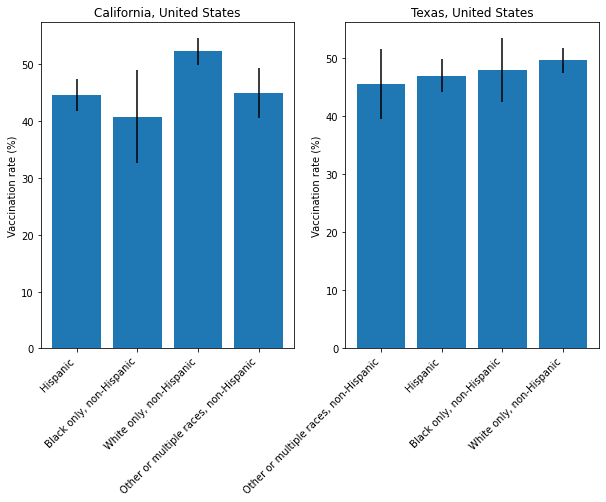

In [39]:
vaccine_coverage["upperError"] = vaccine_coverage["upperLimit"] - vaccine_coverage["value"]
vaccine_coverage["lowerError"] = vaccine_coverage["value"] - vaccine_coverage["lowerLimit"]

plt.figure(figsize = (10, 6))

plt.subplot(1, 2, 1)
plt.bar(
    vaccine_coverage.loc[vaccine_coverage["location.id"] == "California_UnitedStates", "demographicClassDetails"], 
    vaccine_coverage.loc[vaccine_coverage["location.id"] == "California_UnitedStates", "value"], 
    yerr = [
        vaccine_coverage.loc[vaccine_coverage["location.id"] == "California_UnitedStates", "upperError"], 
        vaccine_coverage.loc[vaccine_coverage["location.id"] == "California_UnitedStates", "lowerError"], 
    ]
)
plt.ylabel("Vaccination rate (%)")
plt.xticks(rotation = 45, ha = "right")
plt.title("California, United States")

plt.subplot(1, 2, 2)
plt.bar(
    vaccine_coverage.loc[vaccine_coverage["location.id"] == "Texas_UnitedStates", "demographicClassDetails"], 
    vaccine_coverage.loc[vaccine_coverage["location.id"] == "Texas_UnitedStates", "value"], 
    yerr = [
        vaccine_coverage.loc[vaccine_coverage["location.id"] == "Texas_UnitedStates", "upperError"], 
        vaccine_coverage.loc[vaccine_coverage["location.id"] == "Texas_UnitedStates", "lowerError"], 
    ]
)
plt.ylabel("Vaccination rate (%)")
plt.xticks(rotation = 45, ha = "right")
plt.title("Texas, United States")

plt.show()

<a id="locationpolicysummary"></a>
## Access Policy data

`LocationPolicySummary` stores COVID-19 social distancing and health policies and regulations enacted by US states. See the [API documentation](https://c3.ai/covid-19-api-documentation/#tag/LocationPolicySummary) for more details. 
<br />

`PolicyDetail` stores country-level policy responses to COVID-19 including:  
* Financial sector policies (from The World Bank: Finance Related Policy Responses to COVID-19), 
* Containment and closure, economic, and health system policies (from University of Oxford: Coronavirus Government Response Tracker, OxCGRT), and 
* Policies in South Korea (from Data Science for COVID-19: South Korea).
      
See the [API documentation](https://c3.ai/covid-19-api-documentation/#tag/PolicyDetail) for more details.

In [40]:
policy_united_states = c3aidatalake.fetch(
  "locationpolicysummary",
  {
      "spec" : {
          "filter" : "contains(location.id, 'UnitedStates')",
          "limit" : -1
      }
  }
)

policy_united_states

,easingOrder,stayAtHome,mandatoryQuarantine,nonEssentialBusiness,largeGatherings,schoolClosure,restaurantLimit,barClosures,faceCoveringRequirement,PrimaryElectionPostponement,...,premiumPaymentGracePeriod,marketplaceSpecialEnrollmentPeriod,section1135Waiver,paidSickLeaves,expandsAccesstoTelehealthServices,id,lastSavedTimestamp,numSavedVersions,savedVersion,location.id
0,Proceeding with Reopening,Lifted,All Travelers,All Non-Essential Businesses Permitted to Reopen,Lifted,Closed for School Year,Reopened to Dine-in Service,Reopened,Required for Certain Employees,No,...,Expired,No,Approved,No Action,Yes,Alaska_UnitedStates_Policy,2020-09-12T02:52:54Z,5,-1,Alaska_UnitedStates
1,New Restrictions Imposed,Lifted,Lifted,New Business Closures or Limits,New Limit on Large Gatherings in Place,Closed for School Year,New Service Limits,Newly Closed,Required for Certain Employees; Allows Local O...,No,...,No Action,No,Approved,Enacted,Yes,Arizona_UnitedStates_Policy,2020-09-12T02:52:54Z,5,-1,Arizona_UnitedStates
2,Paused,No Action,Lifted,No Action,Lifted,Closed for School Year,Reopened to Dine-in Service with Capacity Limits,Reopened,Required for General Public,No,...,COVID-19 Diagnosis/Impacts Only,No,Approved,No Action,Yes,Arkansas_UnitedStates_Policy,2020-09-12T02:52:54Z,4,-1,Arkansas_UnitedStates
3,New Restrictions Imposed,Statewide,No Action,New Business Closures or Limits,All Gatherings Prohibited,Recommended Closure for School Year,Newly Closed to Dine-in Service,Newly Closed,Required for General Public,No,...,No Action,Active,Approved,Enacted,Yes,California_UnitedStates_Policy,2020-09-12T02:52:54Z,5,-1,California_UnitedStates
4,New Restrictions Imposed,Lifted,No Action,Some Non-Essential Businesses Permitted to Reo...,Expanded to New Limit of 25 or Fewer,Closed for School Year,Reopened to Dine-in Service with Capacity Limits,Newly Closed,Required for General Public,No,...,No Action,Ended,Approved,Enacted,Yes,Colorado_UnitedStates_Policy,2020-09-12T02:52:54Z,5,-1,Colorado_UnitedStates
5,Proceeding with Reopening,Lifted,From Certain States (New),All Non-Essential Businesses Permitted to Reop...,Expanded to New Limit of 25 or Fewer,Closed for School Year,Reopened to Dine-in Service with Capacity Limits,Closed,Required for General Public,Postponed,...,Expired,Ended,Approved,Enacted,Yes,Connecticut_UnitedStates_Policy,2020-09-12T02:52:54Z,5,-1,Connecticut_UnitedStates
6,New Restrictions Imposed,Lifted,Lifted,Some Non-Essential Businesses Permitted to Reo...,Expanded to New Limit Above 25,Closed for School Year,Reopened to Dine-in Service with Capacity Limits,New Service Limits,Required for General Public,Postponed,...,Expired,No,Approved,No Action,Yes,Delaware_UnitedStates_Policy,2020-09-12T02:52:54Z,5,-1,Delaware_UnitedStates
7,Proceeding with Reopening,Lifted,From Certain States (New),Some Non-Essential Businesses Permitted to Reo...,Expanded to New Limit Above 25,Closed for School Year,Reopened to Dine-in Service with Capacity Limits,Closed,Required for General Public,No,...,No Action,Active,Approved,Enacted,Yes,District of Columbia_UnitedStates_Policy,2020-09-12T02:52:54Z,5,-1,DistrictofColumbia_UnitedStates
8,New Restrictions Imposed,Lifted,Lifted,All Non-Essential Businesses Permitted to Reop...,Lifted,Recommended Closure for School Year,Reopened to Dine-in Service with Capacity Limits,Newly Closed,Required for Certain Employees,No,...,No Action,No,Approved,No Action,No,Florida_UnitedStates_Policy,2020-09-12T02:52:54Z,5,-1,Florida_UnitedStates
9,Proceeding with Reopening,Rolled Back to High Risk Groups,No Action,All Non-Essential Businesses Permitted to Reopen,Expanded to New Limit Above 25,Closed for School Year,Reopened to Dine-in Service,Reopened,Required for Certain Employees; Allows Local O...,Postponed,...,Expired,No,Approved,No Action,No,Georgia_UnitedStates_Policy,2020-09-12T02:52:54Z,5,-1,Georgia_UnitedStates


Use the `AllVersionsForPolicy` API of `LocationPolicySummary` to access historical and current versions of a policy.

In [41]:
versions = c3aidatalake.read_data_json(
    "locationpolicysummary",
    "allversionsforpolicy",
    {
        "this" : {
            "id" : "Wisconsin_UnitedStates_Policy"
        }
    }
)

pd.json_normalize(versions)

,versionDate,easingOrder,stayAtHome,mandatoryQuarantine,nonEssentialBusiness,largeGatherings,schoolClosure,restaurantLimit,barClosures,faceCoveringRequirement,...,meta.tenant,meta.tag,meta.created,meta.createdBy,meta.updated,meta.updatedBy,meta.timestamp,meta.sourceFile,meta.fetchInclude,meta.fetchType
0,2020-09-12T00:00:00Z,Reopened,Lifted,No Action,All Non-Essential Businesses Permitted to Reopen,Lifted,Closed for School Year,Reopened to Dine-in Service,Reopened,Required for General Public,...,covid,prod,2020-05-05T04:57:50Z,dataloader,2020-09-12T02:58:19Z,pruthvi.bheemarasetti@c3iot.com,2020-09-12T02:58:19Z,KFF_SocialDistancingActions_091020.csv,"[this,versionEdits]",Policy
1,2020-05-29T00:00:00Z,Reopened,Lifted,No Action,All Non-Essential Businesses Permitted to Reopen,Lifted,Closed for School Year,Reopened to Dine-in Service,Reopened,Required for General Public,...,covid,prod,2020-05-05T04:57:50Z,dataloader,2020-09-12T02:52:55Z,pruthvi.bheemarasetti@c3iot.com,2020-09-12T02:52:55Z,KFF_SocialDistancingActions_091020.csv,"[this,versionEdits]",Policy
2,2020-05-29T00:00:00Z,Yes,Lifted,No Action,All Non-Essential Businesses Permitted to Reopen,Lifted,Closed for School Year,Reopened to Dine-in Service,NaN,NaN,...,covid,prod,2020-05-05T04:57:50Z,dataloader,2020-05-29T23:15:11Z,elliot.kirk@c3iot.com,2020-05-29T23:15:11Z,StateSocialDistancingActionsMay29_cleaned.csv,"[this,versionEdits]",Policy
3,NaN,No,Statewide,No Action,All Non-Essential Businesses Closed,All Gatherings Prohibited,Closed for School Year,Closed Except for Takeout/Delivery,NaN,NaN,...,covid,prod,2020-05-05T04:57:50Z,dataloader,2020-05-29T19:39:11Z,elliot.kirk@c3iot.com,2020-05-29T19:39:11Z,StateSocialDistancingPolicies_05012020_cleaned...,"[this,versionEdits]",Policy
4,NaN,No,Statewide,No Action,All Non-Essential Businesses Closed,All Gatherings Prohibited,Closed for School Year,Closed Except for Takeout/Delivery,NaN,NaN,...,covid,prod,2020-05-05T04:57:50Z,dataloader,2020-05-05T04:59:29Z,ethan.ho@c3iot.com,2020-05-05T04:59:29Z,StateSocialDistancingPolicies_05012020_cleaned...,"[this,versionEdits]",Policy
5,NaN,Reopens Certain Businesses,Statewide,No Action,Certain Non-Essential Businesses*,All Gatherings Prohibited,Closed for School Year,Closed Except for Takeout/Delivery,NaN,NaN,...,covid,prod,2020-05-05T04:57:50Z,dataloader,2020-05-05T04:58:31Z,ethan.ho@c3iot.com,2020-05-05T04:58:31Z,StateSocialDistancingMeasures_cleaned.csv,"[this,versionEdits]",Policy


Fetch all school closing policies that restrict gatherings between 11-100 people from OxCGRT dataset in `PolicyDetail`.

In [42]:
school_policy = c3aidatalake.fetch(
  "policydetail",
  {
    "spec" : {
        "filter": "contains(lowerCase(name), 'school') && value == 3 && origin == 'University of Oxford'",
        "limit": -1
    }
  }
)

school_policy

,startDate,policyType,name,value,flag,details,origin,id,location.id
0,2020-06-07T00:00:00Z,C1,School closing,3,1,[COVID-19: Despite 3-Month Extension of School...,University of Oxford,Afghanistan_00e495f4b1dce8012dc388df52858596,Afghanistan
1,2020-03-14T00:00:00Z,C1,School closing,3,1,"On March 14, 2020, the Afghan government annou...",University of Oxford,Afghanistan_08bb900a1c5cfdddf64ac643627c89ec,Afghanistan
2,2020-05-22T00:00:00Z,C1,School closing,3,1,"""UNICEF Afghanistan Representative, Dr. Abouba...",University of Oxford,Afghanistan_17c877f89f6b0f34270499298244982a,Afghanistan
3,2020-03-14T00:00:00Z,C1,School closing,3,1,"On March 14, 2020, the Afghan government ann...",University of Oxford,Afghanistan_8c07753de3f7fbe6ab7091fccce7bd3e,Afghanistan
4,2020-03-15T00:00:00Z,C1,School closing,3,1,"On March 14, 2020, the Afghan government annou...",University of Oxford,Afghanistan_aa64d269014884c5ea6c0d62af11ad4e,Afghanistan
...,...,...,...,...,...,...,...,...,...
1110,2020-08-21T00:00:00Z,C1,School closing,3,1,Schools at all levels remain closed in zimbabw...,University of Oxford,Zimbabwe_7b6b8bf90fd29ca6aa5122710e78cca8,Zimbabwe
1111,2020-04-26T00:00:00Z,C1,School closing,3,1,PREPARATIONS for the second school term have b...,University of Oxford,Zimbabwe_9ddb4710847f18e10911c1d6206306d2,Zimbabwe
1112,2020-07-08T00:00:00Z,C1,School closing,3,1,All levels of education remain closed in Zimba...,University of Oxford,Zimbabwe_b2be1d3ac5824e4e51c8e31855f50cb0,Zimbabwe
1113,2020-07-30T00:00:00Z,C1,School closing,3,1,Country wide closure of schools. https://we...,University of Oxford,Zimbabwe_e57bc62bd09894e28bc50d3711c08adb,Zimbabwe


<a id="labor"></a>
## Access LaborDetail data

`LaborDetail` stores historical monthly labor force and employment data for US counties and states from US Bureau of Labor Statistics. See the [API documentation](https://c3.ai/covid-19-api-documentation/#tag/LaborDetail) for more details. 
<br />

In [43]:
# Fetch the unemployment rates of counties in California in March, 2020
labordetail = c3aidatalake.fetch(
    "labordetail",
    {
        "spec": {
            "filter": "year == 2020 && month == 3 && contains(parent, 'California_UnitedStates')"
        }
    }
)

labordetail

,year,month,laborForce,employedPopulation,unemployedPopulation,unemploymentRate,origin,id,timestamp,parent.id
0,2020,3,835440,802729,32711,3.915422,Bureau of Labor Statistics,2020_03_Alameda_California_UnitedStates,2020-03-01T00:00:00Z,Alameda_California_UnitedStates
1,2020,3,530,491,39,7.358491,Bureau of Labor Statistics,2020_03_Alpine_California_UnitedStates,2020-03-01T00:00:00Z,Alpine_California_UnitedStates
2,2020,3,14790,13980,810,5.476673,Bureau of Labor Statistics,2020_03_Amador_California_UnitedStates,2020-03-01T00:00:00Z,Amador_California_UnitedStates
3,2020,3,99081,92305,6776,6.838849,Bureau of Labor Statistics,2020_03_Butte_California_UnitedStates,2020-03-01T00:00:00Z,Butte_California_UnitedStates
4,2020,3,21505,20323,1182,5.496396,Bureau of Labor Statistics,2020_03_Calaveras_California_UnitedStates,2020-03-01T00:00:00Z,Calaveras_California_UnitedStates
...,...,...,...,...,...,...,...,...,...,...
111,2020,3,207334,176912,30422,14.672943,Bureau of Labor Statistics,2020_3_Tulare_California_UnitedStates,2020-03-01T00:00:00Z,Tulare_California_UnitedStates
112,2020,3,20942,19588,1354,6.465476,Bureau of Labor Statistics,2020_3_Tuolumne_California_UnitedStates,2020-03-01T00:00:00Z,Tuolumne_California_UnitedStates
113,2020,3,422108,402081,20027,4.744520,Bureau of Labor Statistics,2020_3_Ventura_California_UnitedStates,2020-03-01T00:00:00Z,Ventura_California_UnitedStates
114,2020,3,108875,102368,6507,5.976579,Bureau of Labor Statistics,2020_3_Yolo_California_UnitedStates,2020-03-01T00:00:00Z,Yolo_California_UnitedStates


<a id="survey"></a>
## Access Survey data

`SurveyData` stores COVID-19-related public opinion, demographic, and symptom prevalence data collected from COVID-19 survey responses. See the [API documentation](https://c3.ai/covid-19-api-documentation/#tag/SurveyData) for more details. 

In [44]:
# Fetch participants who are located in California and who have a relatively strong intent to wear a mask in public because of COVID-19
survey = c3aidatalake.fetch(
    "surveydata",
    {
        "spec": {
            "filter": "location == 'California_UnitedStates' && coronavirusIntent_Mask >= 75"
        }
    },
    get_all = True
)

survey

,id,annualHouseholdIncome,birthYear2020,coronavirusConcern,coronavirusEmployment,coronavirusIntent_Mask,coronavirusIntent_SixFeet,coronavirusIntent_StayHome,coronavirusIntent_WashHands,coronavirusLocalCommunity,...,elderlyMoreRisk,coronaAllHospitalize,coronaKillsMost,ethnicitySpreadsCovid,allSpreadCovid,nonNativesSpreadCovid,asymptomaticSpread,onlySickSpread,infectFromAnimal,location.id
0,0014fa29afed18b4c3533df6d3fe3893,199999.0,1978,7.8,"was-jobless, now-jobless",88.0,88.0,83.0,87.0,1.0,...,True,True,False,False,True,False,True,False,False,California_UnitedStates
1,003e154ae15ee3b01b61b712fbc294d5,9000.0,1999,7.9,was-part,100.0,100.0,92.0,100.0,0.0,...,True,True,True,True,False,False,True,False,False,California_UnitedStates
2,00b47a4ea2fab1b5ff469085e804f2db,NaN,1988,2.3,now-jobless,100.0,100.0,7.0,100.0,0.0,...,True,False,False,False,True,False,False,True,False,California_UnitedStates
3,010ddcaa28c199ec616105a90213f17c,205000.0,1984,7.7,was-full,97.0,92.0,94.0,97.0,2.0,...,True,True,False,False,True,False,True,False,False,California_UnitedStates
4,0122369c8b3dee5aabb0c97f6536454f,160000.0,1980,2.6,was-full,92.0,74.0,28.0,33.0,0.0,...,True,True,False,True,False,True,True,False,False,California_UnitedStates
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,ff485b8841db3645ce276aae00870771,100000.0,1990,10.0,was-full,88.0,93.0,88.0,89.0,3.0,...,False,False,False,True,False,False,True,False,False,California_UnitedStates
21,ffc7643d651a6f7bf1bf7d31ae4ac355,NaN,1992,7.4,was-jobless,100.0,100.0,100.0,100.0,0.0,...,True,True,False,False,True,False,True,False,False,California_UnitedStates
22,ffc776f91398a46f57057c38a4caa6a2,0.0,1983,9.4,now-disabled,92.0,94.0,94.0,100.0,0.0,...,True,False,False,False,False,True,True,True,True,California_UnitedStates
23,ffcafb27f02f2217e3cf263a186cc33b,NaN,1996,10.0,now-jobless,100.0,100.0,100.0,100.0,0.0,...,False,False,True,False,True,False,False,False,True,California_UnitedStates


Plot the results.

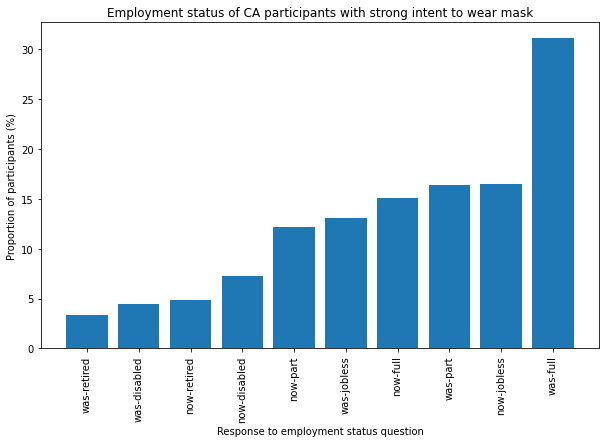

In [45]:
employment_df = survey.copy()
employment_df["coronavirusEmployment"] = employment_df["coronavirusEmployment"].str.split(", ")
employment_df = employment_df.explode("coronavirusEmployment")
employment_df = employment_df.groupby(["coronavirusEmployment"]).agg("count")[["id"]].sort_values("id")

# Plot the data
plt.figure(figsize = (10, 6))
plt.bar(employment_df.index, 100 * employment_df["id"] / len(survey))
plt.xticks(rotation = 90)
plt.xlabel("Response to employment status question")
plt.ylabel("Proportion of participants (%)")
plt.title("Employment status of CA participants with strong intent to wear mask")
plt.show()